In [ ]:
#import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('UsaHospitalBeds.csv')
dd = pd.read_csv('us_counties.csv')

In [ ]:
df.head(5)

,X,Y,OBJECTID,HOSPITAL_NAME,HOSPITAL_TYPE,HQ_ADDRESS,HQ_ADDRESS1,HQ_CITY,HQ_STATE,HQ_ZIP_CODE,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,Maricopa,Arizona,4.0,13.0,4013.0,62.0,62.0,0,0,NaN,NaN,0,0.0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,Pima,Arizona,4.0,19.0,4019.0,295.0,295.0,2,2,NaN,NaN,0,2.0
2,-119.779742,36.773323,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,Fresno,California,6.0,19.0,6019.0,54.0,54.0,2,2,NaN,NaN,0,2.0
3,-72.957610,41.284400,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,New Haven,Connecticut,9.0,9.0,9009.0,216.0,216.0,1,1,NaN,NaN,0,2.0
4,-75.606533,39.740206,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,New Castle,Delaware,10.0,3.0,10003.0,62.0,62.0,0,0,NaN,NaN,0,1.0


In [ ]:
dd.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'HOSPITAL_NAME', 'HOSPITAL_TYPE', 'HQ_ADDRESS',
       'HQ_ADDRESS1', 'HQ_CITY', 'HQ_STATE', 'HQ_ZIP_CODE', 'COUNTY_NAME',
       'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'NUM_LICENSED_BEDS',
       'NUM_STAFFED_BEDS', 'NUM_ICU_BEDS', 'ADULT_ICU_BEDS', 'PEDI_ICU_BEDS',
       'BED_UTILIZATION', 'Potential_Increase_In_Bed_Capac',
       'AVG_VENTILATOR_USAGE'],
      dtype='object')

In [ ]:
dd.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [ ]:
df1 = df.drop(['OBJECTID','X','Y','STATE_FIPS','FIPS','CNTY_FIPS','HQ_ADDRESS','HOSPITAL_NAME','HOSPITAL_TYPE','HQ_ADDRESS1',
               "HQ_CITY","HQ_STATE","HQ_ZIP_CODE"], axis=1)

In [ ]:
dd1 = dd.drop(['date','fips'], axis = 1)

In [ ]:
df1.columns

Index(['COUNTY_NAME', 'STATE_NAME', 'NUM_LICENSED_BEDS', 'NUM_STAFFED_BEDS',
       'NUM_ICU_BEDS', 'ADULT_ICU_BEDS', 'PEDI_ICU_BEDS', 'BED_UTILIZATION',
       'Potential_Increase_In_Bed_Capac', 'AVG_VENTILATOR_USAGE'],
      dtype='object')

In [ ]:
df1.describe

<bound method NDFrame.describe of      COUNTY_NAME  ... AVG_VENTILATOR_USAGE
0       Maricopa  ...                  0.0
1           Pima  ...                  2.0
2         Fresno  ...                  2.0
3      New Haven  ...                  2.0
4     New Castle  ...                  1.0
...          ...  ...                  ...
6616      Travis  ...                  NaN
6617     Henrico  ...                  NaN
6618       Caddo  ...                  NaN
6619     Bastrop  ...                  NaN
6620       Berks  ...                  NaN

[6621 rows x 10 columns]>

In [ ]:
df1.isnull().sum()

COUNTY_NAME                         25
STATE_NAME                          25
NUM_LICENSED_BEDS                  148
NUM_STAFFED_BEDS                   236
NUM_ICU_BEDS                         0
ADULT_ICU_BEDS                       0
PEDI_ICU_BEDS                      737
BED_UTILIZATION                    711
Potential_Increase_In_Bed_Capac      0
AVG_VENTILATOR_USAGE                75
dtype: int64

In [ ]:
"""convert_nums = {"HOSPITAL_TYPE": {"VA Hospital": 1, 
                              "Short Term Acute Care Hospital": 2,
                              "Critical Access Hospital": 3,
                              "Childrens Hospital": 4,
                              "Long Term Acute Care Hospital": 5,
                              "Psychiatric Hospital": 6,
                              "Rehabilitation Hospital": 7,
                              "Religious Non-Medical Health Care Institution": 8,
                              "Department of Defense Hospital": 9
                              },
                "HQ_STATE": {"AZ":1, "CA":2, "CT":3, "DE":4, "DC":5, "FL":6, "ID":7,
                            "LA":8, "MS":9, "MO":10, "NM":11,"NY":12, "ND":13, "OR":14, 
                             "PA":15, "AL":16, "AK":17,"ME":18, "MD":19, "MA":20, "AR":21,
                             "RI":22,"SC":23, "WV":24, "CO":25, "GA":26, "HI":27,"IL":28,"IN":29,
                             "IA":30, "KS":31, "KY":32, "MI":33,"MN":34,"MT":35, "NE":36, "NV":37, 
                             "NH":38, "NJ":39, "NC":40, "OH":41, "OK":42, "SD":43, "TN":44,"TX":45,"UT":46,
                             "VT":47, "VA":48,"WA":49, "WI":50, "WY":51, "AS":52, "GU":53, "MP":54, "PR":55,"VI":56},
                           }

#convert the columns to numbers using replace
df_2 = df1.copy()
df_2.replace(convert_nums, inplace=True)
df_2.head()"""

'convert_nums = {"HOSPITAL_TYPE": {"VA Hospital": 1, \n                              "Short Term Acute Care Hospital": 2,\n                              "Critical Access Hospital": 3,\n                              "Childrens Hospital": 4,\n                              "Long Term Acute Care Hospital": 5,\n                              "Psychiatric Hospital": 6,\n                              "Rehabilitation Hospital": 7,\n                              "Religious Non-Medical Health Care Institution": 8,\n                              "Department of Defense Hospital": 9\n                              },\n                "HQ_STATE": {"AZ":1, "CA":2, "CT":3, "DE":4, "DC":5, "FL":6, "ID":7,\n                            "LA":8, "MS":9, "MO":10, "NM":11,"NY":12, "ND":13, "OR":14, \n                             "PA":15, "AL":16, "AK":17,"ME":18, "MD":19, "MA":20, "AR":21,\n                             "RI":22,"SC":23, "WV":24, "CO":25, "GA":26, "HI":27,"IL":28,"IN":29,\n                      

In [ ]:
df2 = df1.groupby(['STATE_NAME','COUNTY_NAME']).sum()

In [ ]:
df2.head(10)

NUM_LICENSED_BEDS  ...  AVG_VENTILATOR_USAGE
STATE_NAME COUNTY_NAME                     ...                      
Alabama    Autauga                   85.0  ...                   2.0
           Baldwin                  386.0  ...                   8.0
           Barbour                   74.0  ...                   2.0
           Bibb                      35.0  ...                   1.0
           Blount                    25.0  ...                   2.0
           Bullock                   61.0  ...                   1.0
           Butler                    72.0  ...                   2.0
           Calhoun                  486.0  ...                  15.0
           Chambers                 115.0  ...                   0.0
           Cherokee                  60.0  ...                   1.0

[10 rows x 8 columns]

In [ ]:
dd1.head(5)

,county,state,cases,deaths
0,Snohomish,Washington,1,0
1,Snohomish,Washington,1,0
2,Snohomish,Washington,1,0
3,Cook,Illinois,1,0
4,Snohomish,Washington,1,0


In [ ]:
dd2  = dd1.groupby(['state','county']).sum()

In [ ]:
dd2.head(100)

cases  deaths
state   county                  
Alabama Autauga    39785     931
        Baldwin    77258     992
        Barbour    24648     155
        Bibb       13685     103
        Blount     19359      82
...                  ...     ...
Arizona Cochise    45600    1059
        Coconino  156702    8541
        Gila       20504     603
        Graham     10559     201
        Greenlee    1611      70

[100 rows x 2 columns]

In [ ]:
result = pd.concat([df2, dd2], axis=1)

In [ ]:
result.head(100)

NUM_LICENSED_BEDS  ...  deaths
Alabama Autauga                                         85.0  ...   931.0
        Baldwin                                        386.0  ...   992.0
        Barbour                                         74.0  ...   155.0
        Bibb                                            35.0  ...   103.0
        Blount                                          25.0  ...    82.0
...                                                      ...  ...     ...
Alaska  Northwest Arctic                                17.0  ...     NaN
        Northwest Arctic Borough                         NaN  ...     0.0
        Petersburg                                      12.0  ...     NaN
        Petersburg Borough                               NaN  ...     0.0
        Prince of Wales-Hyder Census Area                NaN  ...     0.0

[100 rows x 10 columns]

In [ ]:
result.dropna()

NUM_LICENSED_BEDS  NUM_STAFFED_BEDS  ...    cases  deaths
Alabama Autauga                  85.0              55.0  ...  39785.0   931.0
        Baldwin                 386.0             362.0  ...  77258.0   992.0
        Barbour                  74.0              30.0  ...  24648.0   155.0
        Bibb                     35.0              25.0  ...  13685.0   103.0
        Blount                   25.0              25.0  ...  19359.0    82.0
...                               ...               ...  ...      ...     ...
Wyoming Sweetwater              115.0              74.0  ...   7598.0    34.0
        Teton                    48.0              48.0  ...  14958.0   100.0
        Uinta                   225.0             105.0  ...   9787.0     4.0
        Washakie                 18.0              18.0  ...   3102.0   291.0
        Weston                   12.0              12.0  ...    130.0     0.0

[2435 rows x 10 columns]

In [ ]:
result.to_csv('result.csv')

In [ ]:
result1 = pd.read_csv('result_er.csv')

In [ ]:
result1.head(10)

,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,PEDI_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,cases,deaths
0,85.0,55.0,6.0,6.0,0.0,0.623113,30.0,2.0,12043.0,299.0
1,386.0,362.0,51.0,51.0,0.0,2.248812,24.0,8.0,18874.0,485.0
2,74.0,30.0,5.0,5.0,0.0,0.378721,44.0,2.0,8301.0,56.0
3,35.0,25.0,4.0,4.0,0.0,0.430904,10.0,1.0,4623.0,47.0
4,25.0,25.0,6.0,6.0,0.0,0.499069,0.0,2.0,4422.0,38.0
5,61.0,30.0,5.0,5.0,0.0,0.212877,31.0,1.0,8678.0,238.0
6,72.0,44.0,7.0,7.0,0.0,0.187111,28.0,2.0,19950.0,800.0
7,486.0,435.0,30.0,30.0,0.0,1.294690,51.0,15.0,10432.0,211.0
8,115.0,84.0,15.0,15.0,0.0,0.398726,31.0,0.0,26527.0,1652.0
9,60.0,45.0,8.0,8.0,0.0,0.242532,15.0,1.0,2228.0,128.0


In [ ]:
result1.isnull().sum()

NUM_LICENSED_BEDS                  764
NUM_STAFFED_BEDS                   764
NUM_ICU_BEDS                       764
ADULT_ICU_BEDS                     764
PEDI_ICU_BEDS                      764
BED_UTILIZATION                    764
Potential_Increase_In_Bed_Capac    764
AVG_VENTILATOR_USAGE               764
cases                              113
deaths                             113
dtype: int64

In [ ]:
result2 = result1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
result2 = result1.dropna()#result.fillna(, inplace=True)

In [ ]:
result2.isnull().sum()

NUM_LICENSED_BEDS                  0
NUM_STAFFED_BEDS                   0
NUM_ICU_BEDS                       0
ADULT_ICU_BEDS                     0
PEDI_ICU_BEDS                      0
BED_UTILIZATION                    0
Potential_Increase_In_Bed_Capac    0
AVG_VENTILATOR_USAGE               0
cases                              0
deaths                             0
dtype: int64

In [ ]:
result2.shape

(2387, 10)

In [ ]:
#Import all needed libraries for this project
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Y = result2['BED_UTILIZATION']
X = result2.drop(['BED_UTILIZATION'],axis=1)

In [ ]:
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=10, shuffle=True)

In [ ]:
pca = PCA(n_components=5)
X_train  = pca.fit_transform(X_train)
X_test  = pca.fit_transform(X_test)

Root Mean Squared Error:, 1.51
Test Variance Score: 0.7669
R^2 Prediction Score: 0.9952


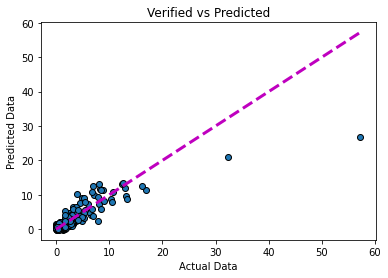

In [ ]:
#Training the algorithm with the sample dataset
estModel = GradientBoostingRegressor(n_estimators = 800, random_state = 5)
estModel.fit(X_train, Y_train)
#Model Score
mScore = estModel.score(X_train,Y_train)

#Prediction
Predict_Y = estModel.predict(X_test)

#Evaluating algorithm performance
#MSE Result
rmse = mean_squared_error(Y_test,Predict_Y)
print('Root Mean Squared Error:, %.2f' % np.sqrt(rmse))
#Variance score: 1 is perfect prediction score
print('Test Variance Score: %.4f' % r2_score(Y_test, Predict_Y))
#Variance score: 1 is perfect prediction score
print('R^2 Prediction Score: %.4f'% mScore)

#Root Mean Squared Error
#mse = np.sqrt(np.mean((Y_test - Predict_Y)**2))
#time.sleep(1)
#rint('Root Mean Square Error: %.4f'%rmse)
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_Y, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()

RMSE value ≥0.5 reflects the poor ability of the model to accurately predict the data.

RMSE close to zero and R-Square approaching 1 are indicative of high accuracy between observed and predicted values.

It depends on your research work but more then 50%, R2 value with low RMES value is acceptable to scientific research community, Results with low R2 value of 25% to 30% are valid because it represent your findings.


**Treating problem as a classification problem**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
clf = GradientBoostingClassifier(n_estimators = 500, learning_rate = 0.01, random_state=5)
clf.fit(X_train, Y_train)

mScore = estModel.score(X_train,Y_train)
#Prediction
Predict_Y1 = clf.predict(X_test)


ValueError: ignored

In [ ]:
#Evaluating algorithm performance
#MSE Result
rmse = mean_squared_error(Y_test,Predict_Y1)
print('Root Mean Squared Error:, %.2f' % np.sqrt(rmse))
#Variance score: 1 is perfect prediction score
print('Test Variance Score: %.4f' % r2_score(Y_test, Predict_Y))
#Variance score: 1 is perfect prediction score
print('R^2 Prediction Score: %.4f'% mScore)

#Root Mean Squared Error
#mse = np.sqrt(np.mean((Y_test - Predict_Y)**2))
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(Y_test, Predict_Y1, edgecolors=(0, 0, 0))
pX.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual Data')
pX.set_ylabel('Predicted Data')
pX.set_title("Verified vs Predicted")
plt.show()